In [2]:
# Imports and variables
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

from config import Config
import utils
import model as modellib
import visualize
from model import log

from idrid import IdridConfig, IdridDataset


# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_idrid.h5") #Duplicate path for easy access

In [3]:
# Load training and validation dataset
dataset_train = IdridDataset()
dataset_train.load_idrid('train')
dataset_train.prepare()

dataset_val = IdridDataset()
dataset_val.load_idrid('val')
dataset_val.prepare()

  0%|          | 0/39 [00:00<?, ?it/s]/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 9/9 [00:05<00:00,  1.73it/s]


In [4]:
# Load config
config = IdridConfig()

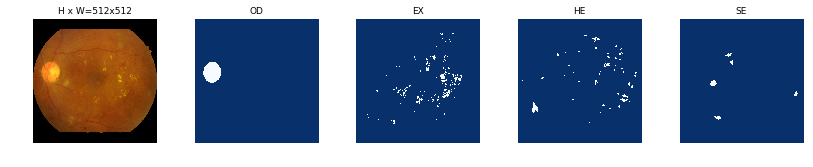

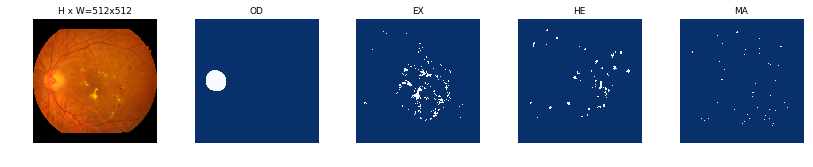

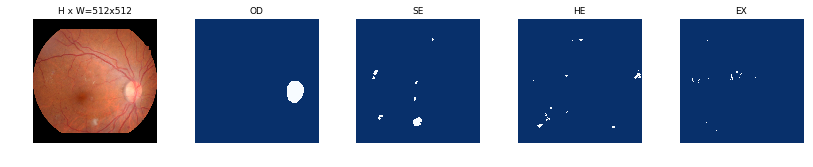

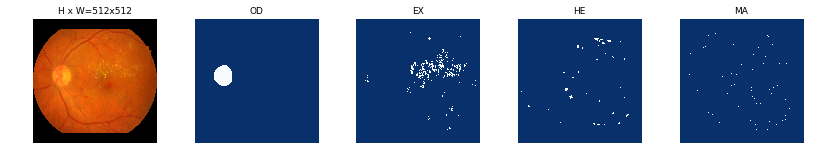

In [5]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [6]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                      model_dir=MODEL_DIR)

In [9]:
#Load weights
last_weights_path = model_path = model.find_last()[1]
if os.path.exists(last_weights_path):
    model.load_weights(last_weights_path)
    print("Loading previous weights from " + last_weights_path)
else:
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
    print("Loading previous weights from COCO")

Loading previous weights from /Users/qinghao1/Documents/CS/ML/Projects/idrid-2/mask_rcnn_idrid.h5


In [ ]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=5, 
            layers='all')


Starting at epoch 2. LR=0.001

Checkpoint Path: /home/chuqh/Documents/idrid-2/logs/idrid20180321T1520/mask_rcnn_idrid_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:2095: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 3/5
 72/100 [====================>.........] - ETA: 1:14:30 - loss: 0.8313 - rpn_class_loss: 0.0100 - rpn_bbox_loss: 0.2740 - mrcnn_class_loss: 0.1896 - mrcnn_bbox_loss: 0.2928 - mrcnn_mask_loss: 0.0648

In [ ]:
# Save weights
model.keras_model.save_weights(MODEL_WEIGHTS_PATH)